# **SwitchChain Analytics**

# 🚀 **Phase 1: Understanding the Problem - Delivery Delay Prediction**

*Capstone Project for SwiftChain Analytics*

## 📝 **Business Context**

SwiftChain Analytics specializes in optimizing supply chain operations using advanced data-driven solutions. Delivery delays are a major challenge, affecting:

✅ Operational costs (re-delivery, compensations)

✅ Customer satisfaction and retention

✅ Reputation and competitiveness

✅ Overall supply chain efficiency

**Goal:** Predict delivery delays using historical logistics data to enable proactive decision-making and improve operational excellence.

## 🎯 **Project Objective**

Develop a machine learning model to classify delivery outcomes:

* `-1` = Late Delivery
* `0` = On-time Delivery
* `1` = Early Delivery

The model will help SwiftChain and its partners reduce delays, cut costs, and enhance customer experience.

---

## 📦 **Dataset Overview**

The dataset provided simulates real-world logistics data with **41 variables**, grouped into:

✅ **Customer Information** — Location, demographics, customer segment

✅ **Order Details** — Order IDs, dates, status, regions

✅ **Product Information** — Product names, categories, departments

✅ **Financial Metrics** — Sales, profit, discount details

✅ **Shipping Information** — Shipping mode, shipping dates

✅ **Target Label** — Delivery outcome (`label` column)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Dataset Loading

In [2]:
# import pandas library
import pandas as pd

# load Dataset into pandas
df = pd.read_csv('/content/drive/My Drive/switch/logistics.csv')


# Initial Data Inspection

In [3]:
# Check dataset dimensions
df.shape

(15549, 41)

In [4]:
# Preview first few records
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15549 entries, 0 to 15548
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type              15549 non-null  object 
 1   profit_per_order          15549 non-null  float64
 2   sales_per_customer        15549 non-null  float64
 3   category_id               15549 non-null  float64
 4   category_name             15549 non-null  object 
 5   customer_city             15549 non-null  object 
 6   customer_country          15549 non-null  object 
 7   customer_id               15549 non-null  float64
 8   customer_segment          15549 non-null  object 
 9   customer_state            15549 non-null  object 
 10  customer_zipcode          15549 non-null  float64
 11  department_id             15549 non-null  float64
 12  department_name           15549 non-null  object 
 13  latitude                  15549 non-null  float64
 14  longit

# 📃 List of Columns & Data Types

In [5]:
# List of all columns
print(df.columns.tolist())


['payment_type', 'profit_per_order', 'sales_per_customer', 'category_id', 'category_name', 'customer_city', 'customer_country', 'customer_id', 'customer_segment', 'customer_state', 'customer_zipcode', 'department_id', 'department_name', 'latitude', 'longitude', 'market', 'order_city', 'order_country', 'order_customer_id', 'order_date', 'order_id', 'order_item_cardprod_id', 'order_item_discount', 'order_item_discount_rate', 'order_item_id', 'order_item_product_price', 'order_item_profit_ratio', 'order_item_quantity', 'sales', 'order_item_total_amount', 'order_profit_per_order', 'order_region', 'order_state', 'order_status', 'product_card_id', 'product_category_id', 'product_name', 'product_price', 'shipping_date', 'shipping_mode', 'label']


In [6]:
# Data types and missing values overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15549 entries, 0 to 15548
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type              15549 non-null  object 
 1   profit_per_order          15549 non-null  float64
 2   sales_per_customer        15549 non-null  float64
 3   category_id               15549 non-null  float64
 4   category_name             15549 non-null  object 
 5   customer_city             15549 non-null  object 
 6   customer_country          15549 non-null  object 
 7   customer_id               15549 non-null  float64
 8   customer_segment          15549 non-null  object 
 9   customer_state            15549 non-null  object 
 10  customer_zipcode          15549 non-null  float64
 11  department_id             15549 non-null  float64
 12  department_name           15549 non-null  object 
 13  latitude                  15549 non-null  float64
 14  longit

# 🎯 Target Variable Distribution Check

In [7]:
# Check unique values in the label column
df['label'].value_counts()


,count
label,
1,8976
-1,3545
0,3028


# 📝 Key Observations (Initial)

- Dataset contains  15549 rows and 41 columns

- The target variable label has the following class distribution:

 - Late Deliveries (-1) = 3545

 - On-time Deliveries (0) = 3028

 - Early Deliveries (1) = 8976

- Basic structure matches expectations

- No loading errors encountered

# **Phase 2: Exploratory Data Analysis (EDA) - Delivery Delay Prediction**

---

## **Objective of EDA**

Before building predictive models, we need to:

✅ Understand data distributions

✅ Detect missing values and outliers

✅ Visualize relationships between key variables

✅ Explore patterns contributing to delivery delays

In [8]:
# Inspect Dataset
df.head()

,payment_type,profit_per_order,sales_per_customer,category_id,category_name,customer_city,customer_country,customer_id,customer_segment,customer_state,...,order_region,order_state,order_status,product_card_id,product_category_id,product_name,product_price,shipping_date,shipping_mode,label
0,DEBIT,34.448338,92.49099,9.0,Cardio Equipment,Caguas,Puerto Rico,12097.6830,Consumer,PR,...,Western Europe,Vienna,COMPLETE,191.0,9.0,Nike Men's Free 5.0+ Running Shoe,99.99,2015-08-13 00:00:00+01:00,Standard Class,-1
1,TRANSFER,91.193540,181.99008,48.0,Water Sports,Albuquerque,EE. UU.,5108.1045,Consumer,CA,...,South America,Buenos Aires,PENDING,1073.0,48.0,Pelican Sunstream 100 Kayak,199.99,2017-04-09 00:00:00+01:00,Standard Class,-1
2,DEBIT,8.313806,89.96643,46.0,Indoor/Outdoor Games,Amarillo,Puerto Rico,4293.4478,Consumer,PR,...,Western Europe,Nord-Pas-de-Calais-Picardy,COMPLETE,1014.0,46.0,O'Brien Men's Neoprene Life Vest,49.98,2015-03-18 00:00:00+00:00,Second Class,1
3,TRANSFER,-89.463196,99.15065,17.0,Cleats,Caguas,Puerto Rico,546.5306,Consumer,PR,...,Central America,Santa Ana,PROCESSING,365.0,17.0,Perfect Fitness Perfect Rip Deck,59.99,2017-03-18 00:00:00+00:00,Second Class,0
4,DEBIT,44.722590,170.97824,48.0,Water Sports,Peabody,EE. UU.,1546.3980,Consumer,CA,...,Central America,Illinois,COMPLETE,1073.0,48.0,Pelican Sunstream 100 Kayak,199.99,2015-03-30 00:00:00+01:00,Standard Class,1


In [9]:
# Data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15549 entries, 0 to 15548
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type              15549 non-null  object 
 1   profit_per_order          15549 non-null  float64
 2   sales_per_customer        15549 non-null  float64
 3   category_id               15549 non-null  float64
 4   category_name             15549 non-null  object 
 5   customer_city             15549 non-null  object 
 6   customer_country          15549 non-null  object 
 7   customer_id               15549 non-null  float64
 8   customer_segment          15549 non-null  object 
 9   customer_state            15549 non-null  object 
 10  customer_zipcode          15549 non-null  float64
 11  department_id             15549 non-null  float64
 12  department_name           15549 non-null  object 
 13  latitude                  15549 non-null  float64
 14  longit

# Descriptive Statistics for Numerical Variables

In [10]:
# Summary Statistics for numeric columns
df.describe()

,profit_per_order,sales_per_customer,category_id,customer_id,customer_zipcode,department_id,latitude,longitude,order_customer_id,order_id,...,order_item_product_price,order_item_profit_ratio,order_item_quantity,sales,order_item_total_amount,order_profit_per_order,product_card_id,product_category_id,product_price,label
count,15549.000000,15549.000000,15549.000000,15549.000000,15549.000000,15549.000000,15549.000000,15549.000000,15549.000000,15549.000000,...,15549.000000,15549.000000,15549.000000,15549.000000,15549.000000,15549.000000,15549.000000,15549.000000,15549.000000,15549.000000
mean,22.604542,179.888256,31.461342,6583.279789,35458.234968,5.413462,29.677619,-84.512318,6586.810354,35718.970019,...,137.005272,0.120391,2.165202,200.562289,179.780850,22.273342,685.213286,31.387606,136.629368,0.349283
std,99.265198,113.727323,15.303616,4114.273782,37343.702033,1.581550,9.877876,20.681015,4101.324290,21071.742668,...,134.545269,0.474088,1.468627,125.984986,110.999735,117.503163,330.778230,15.256620,133.366285,0.826623
min,-3442.500000,8.351162,2.000000,1.000000,603.000000,2.000000,-33.937553,-158.025990,1.000000,1.000000,...,9.990000,-2.750000,1.000000,9.990000,7.490000,-3442.500000,19.000000,2.000000,9.990000,-1.000000
25%,7.562795,104.397330,18.000000,3119.983200,725.000000,4.000000,18.263327,-98.088170,3177.568800,16530.752000,...,50.000000,0.080000,1.000000,119.980000,105.570910,7.443977,403.000000,18.000000,50.000000,0.000000
50%,31.693370,165.944170,29.000000,6429.229000,19145.775000,5.000000,33.435677,-76.580800,6308.530000,35391.336000,...,59.990000,0.270000,1.000000,199.920000,165.990000,32.440100,627.000000,29.000000,59.990000,1.000000
75%,63.872166,242.440930,45.000000,9642.381000,77502.820000,7.000000,39.277313,-66.370575,9703.070000,55236.910000,...,199.990000,0.360000,3.000000,299.950000,242.436400,64.303566,1004.000000,45.000000,199.990000,1.000000
max,911.800000,1939.990000,76.000000,20757.000000,99205.000000,12.000000,48.781933,115.263080,20757.000000,77204.000000,...,1999.990000,0.500000,5.000000,1999.990000,1939.990000,911.800000,1363.000000,76.000000,1999.990000,1.000000


# Descriptive Statistics for Categorical Variables

In [11]:

# Unique values for key categorical columns

print(df['shipping_mode'].value_counts())
print("\n")
print(df['customer_segment'].value_counts())
print("\n")
print(df['order_status'].value_counts())
print("\n")
print(df['customer_country'].value_counts())
print("\n")
print(df['order_region'].value_counts())


shipping_mode
Standard Class    9116
Second Class      3283
First Class       2391
Same Day           759
Name: count, dtype: int64


customer_segment
Consumer       8332
Corporate      4603
Home Office    2614
Name: count, dtype: int64


order_status
COMPLETE           5290
PENDING_PAYMENT    3826
PROCESSING         2046
PENDING            1807
CLOSED             1763
ON_HOLD             761
PAYMENT_REVIEW       56
Name: count, dtype: int64


customer_country
EE. UU.        9438
Puerto Rico    6111
Name: count, dtype: int64


order_region
Western Europe     2513
Central America    2469
South America      1223
Northern Europe     900
Oceania             898
Southern Europe     861
Southeast Asia      849
Caribbean           690
Eastern Asia        683
West of USA         641
East of USA         603
West Asia           569
South Asia          559
US Center           474
South of  USA       335
West Africa         300
Eastern Europe      251
North Africa        244
East Africa         22

# Target Variable Distribution (Delivery Outcome)

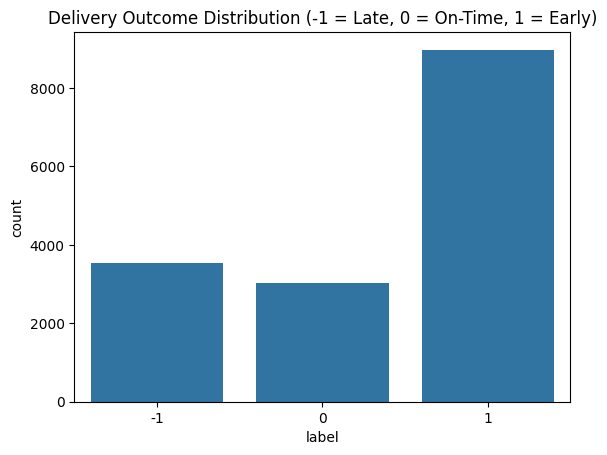

,count
label,
1,8976
-1,3545
0,3028


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Countplot for delivery outcomes
sns.countplot(data=df, x='label')
plt.title('Delivery Outcome Distribution (-1 = Late, 0 = On-Time, 1 = Early)')
plt.show()

# Numeric counts
df['label'].value_counts()


# Missing Values Detection

In [13]:
# Check for missing values in all columns
df.isnull().sum()


,0
payment_type,0
profit_per_order,0
sales_per_customer,0
category_id,0
category_name,0
customer_city,0
customer_country,0
customer_id,0
customer_segment,0
customer_state,0


# Visualizing Key Relationships
> **Shipping Mode vs Delivery Outcomes**

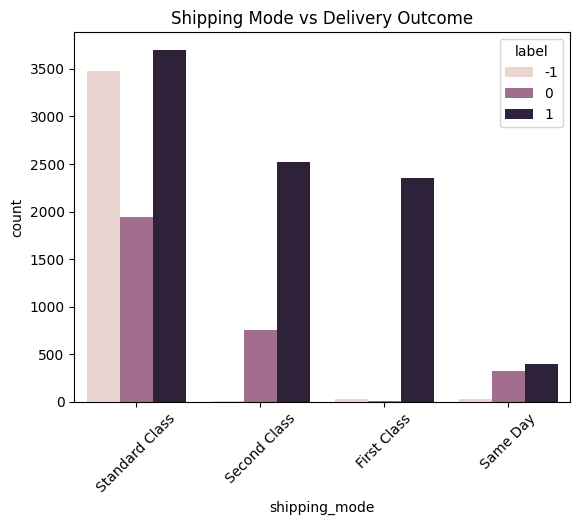

In [14]:
sns.countplot(data=df, x='shipping_mode', hue='label')
plt.title('Shipping Mode vs Delivery Outcome')
plt.xticks(rotation=45)
plt.show()

> **Customer Country vs Delivery Outcome**

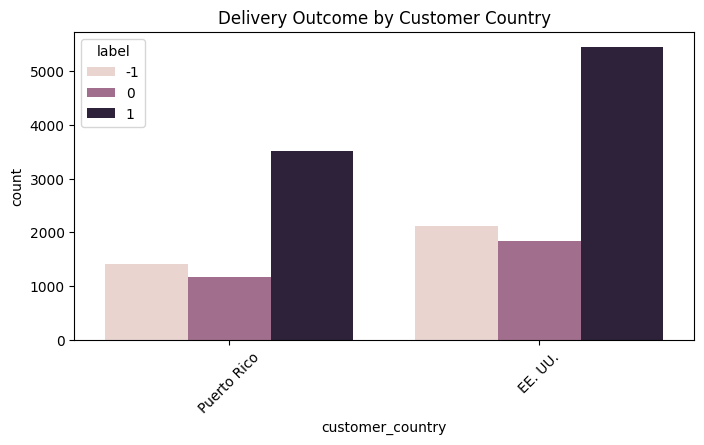

In [15]:
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='customer_country', hue='label')
plt.title('Delivery Outcome by Customer Country')
plt.xticks(rotation=45)
plt.show()

> **Profit per Order vs Delivery Outcome**

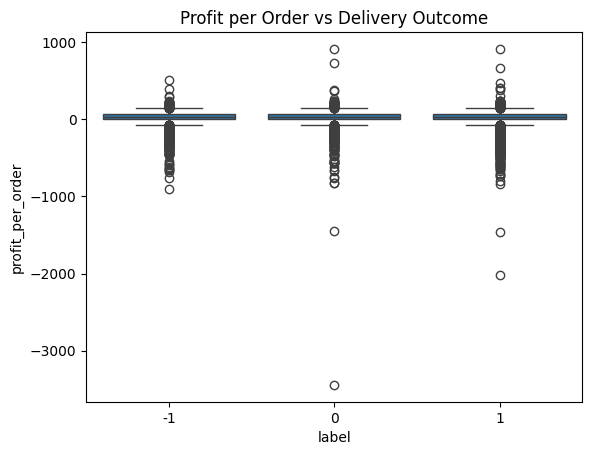

In [16]:
sns.boxplot(data=df, x='label', y='profit_per_order')
plt.title('Profit per Order vs Delivery Outcome')
plt.show()

> **Sales per Customer vs Delivery Outcome**

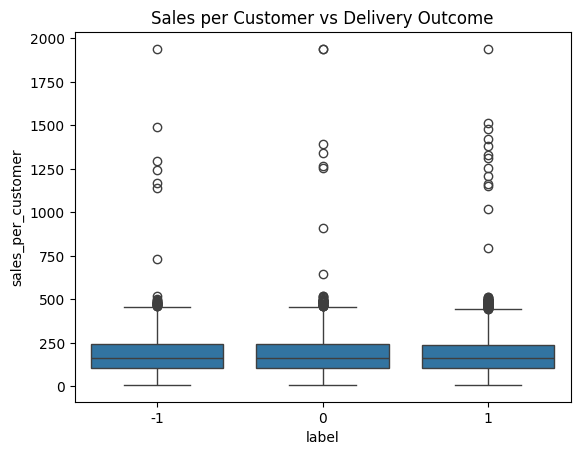

In [17]:
sns.boxplot(data=df, x='label', y='sales_per_customer')
plt.title('Sales per Customer vs Delivery Outcome')
plt.show()

## Summary of Finding
- Dataset contains 15549 rows and 41 columns

- Target class distribution: Late = 3545, On-Time = 3028, Early = 8976

- There are no missing values in the dataset.

- Shipping mode and geography show visible impact on delivery delays

- Outliers observed in profit_per_order, shipping_duration

In [18]:
df['product_name'].value_counts()

,count
product_name,
Perfect Fitness Perfect Rip Deck,2219
Nike Men's CJ Elite 2 TD Football Cleat,1916
Nike Men's Dri-FIT Victory Golf Polo,1886
O'Brien Men's Neoprene Life Vest,1653
Field & Stream Sportsman 16 Gun Fire Safe,1436
...,...
Garmin Forerunner 910XT GPS Watch,2
Nike Men's Free TR 5.0 TB Training Shoe,1
SOLE E35 Elliptical,1


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15549 entries, 0 to 15548
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type              15549 non-null  object 
 1   profit_per_order          15549 non-null  float64
 2   sales_per_customer        15549 non-null  float64
 3   category_id               15549 non-null  float64
 4   category_name             15549 non-null  object 
 5   customer_city             15549 non-null  object 
 6   customer_country          15549 non-null  object 
 7   customer_id               15549 non-null  float64
 8   customer_segment          15549 non-null  object 
 9   customer_state            15549 non-null  object 
 10  customer_zipcode          15549 non-null  float64
 11  department_id             15549 non-null  float64
 12  department_name           15549 non-null  object 
 13  latitude                  15549 non-null  float64
 14  longit

# **Phase 3: Data Preprocessing**

In this phase, we prepare the dataset for modeling. This includes:

- Checking for and handling missing values
- Encoding categorical variables
- Scaling numerical features
- Dropping irrelevant or high-cardinality columns


In [20]:
id_cols = [
    'customer_id',
    'order_id',
    'order_item_id',
    'product_card_id',
    'order_item_cardprod_id',
    'order_customer_id',
    'product_category_id',
    'category_id',
    'department_id'
]

df.drop(columns=id_cols, inplace=True, errors='ignore')


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15549 entries, 0 to 15548
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type              15549 non-null  object 
 1   profit_per_order          15549 non-null  float64
 2   sales_per_customer        15549 non-null  float64
 3   category_name             15549 non-null  object 
 4   customer_city             15549 non-null  object 
 5   customer_country          15549 non-null  object 
 6   customer_segment          15549 non-null  object 
 7   customer_state            15549 non-null  object 
 8   customer_zipcode          15549 non-null  float64
 9   department_name           15549 non-null  object 
 10  latitude                  15549 non-null  float64
 11  longitude                 15549 non-null  float64
 12  market                    15549 non-null  object 
 13  order_city                15549 non-null  object 
 14  order_

# **Drop High-Cardinality Columns**
Notebook Documentation:
> The columns customer_city, customer_state, order_city, order_state, and product_name contain a high number of unique values. Encoding them would:

- Greatly increase dimensionality

- Risk introducing noise and overfitting

- Add complexity with little predictive benefit

These columns are dropped to maintain a lean, interpretable dataset.

In [22]:
high_card_cols = [
    'customer_city',
    'customer_state',
    'order_city',
    'order_state',
    'product_name'
]

df.drop(columns=high_card_cols, inplace=True, errors='ignore')


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15549 entries, 0 to 15548
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type              15549 non-null  object 
 1   profit_per_order          15549 non-null  float64
 2   sales_per_customer        15549 non-null  float64
 3   category_name             15549 non-null  object 
 4   customer_country          15549 non-null  object 
 5   customer_segment          15549 non-null  object 
 6   customer_zipcode          15549 non-null  float64
 7   department_name           15549 non-null  object 
 8   latitude                  15549 non-null  float64
 9   longitude                 15549 non-null  float64
 10  market                    15549 non-null  object 
 11  order_country             15549 non-null  object 
 12  order_date                15549 non-null  object 
 13  order_item_discount       15549 non-null  float64
 14  order_

# Encode Categorical Variables

In [24]:
categorical_cols = [
    'payment_type',
    'category_name',
    'customer_country',
    'customer_segment',
    'market',
    'order_country',
    'order_region',
    'shipping_mode',
    'order_status'
]

# Apply get_dummies to categorical columns
encoded_df = pd.get_dummies(df[categorical_cols], drop_first=True)

# Drop original categorical columns from df
df.drop(columns=categorical_cols, inplace=True)

# Concatenate encoded columns back to df
df = pd.concat([df, encoded_df], axis=1)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15549 entries, 0 to 15548
Columns: 258 entries, profit_per_order to order_status_PROCESSING
dtypes: bool(240), float64(14), int64(1), object(3)
memory usage: 5.7+ MB


## Phase 4: Feature Engineering

In this phase, we engineer and transform features to enhance model performance. Feature engineering helps extract hidden patterns, reduce noise, and make the dataset more predictive.

Steps:
- Create new features from existing columns
- Handle invalid or unrealistic date-based values
- Scale relevant numerical features
- Perform correlation analysis (optional visual filtering)


# Create Shipping Duration Feature

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15549 entries, 0 to 15548
Columns: 258 entries, profit_per_order to order_status_PROCESSING
dtypes: bool(240), float64(14), int64(1), object(3)
memory usage: 5.7+ MB


In [26]:
df[['order_date', 'shipping_date']].dtypes


,0
order_date,object
shipping_date,object


In [27]:
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')
df['shipping_date'] = pd.to_datetime(df['shipping_date'], errors='coerce')

/tmp/ipython-input-27-2965210904.py:1: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')
/tmp/ipython-input-27-2965210904.py:2: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['shipping_date'] = pd.to_datetime(df['shipping_date'], errors='coerce')


In [28]:
# Count missing or invalid dates
df[['order_date', 'shipping_date']].isnull().sum()


,0
order_date,0
shipping_date,0


# Drop Rows with Invalid or Missing Dates
Notebook Documentation:
> Data Cleaning Decision:
Rows containing invalid or missing order_date and shipping_date were excluded.

- Accurate shipping duration is essential for predictive modeling of delivery delays

- Imputing incorrect dates risks introducing bias

- The dataset retains sufficient rows for reliable model training

In [29]:
# Drop rows where order_date or shipping_date is missing
df.dropna(subset=['order_date', 'shipping_date'], inplace=True)

# Confirm new dataset size
df.shape


(15549, 258)

In [30]:
# # Calculate shipping duration in days
# df['shipping_duration'] = (df['shipping_date'] - df['order_date']).dt.days

# # Preview
# df[['order_date', 'shipping_date', 'shipping_duration']].head()


In [31]:
# Convert columns to datetime
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')
df['shipping_date'] = pd.to_datetime(df['shipping_date'], errors='coerce')

# Drop invalid dates if needed
df.dropna(subset=['order_date', 'shipping_date'], inplace=True)

# Correctly calculate shipping duration
df['shipping_duration'] = (df['shipping_date'] - df['order_date']).dt.days


In [32]:
# df[['order_date', 'shipping_date']].isnull().sum()


In [33]:
# df[df['order_date'].isnull()]
# df[df['shipping_date'].isnull()]

In [34]:
# df['order_date'].dtype

In [35]:
# df['shipping_duration'] = (df['shipping_date'] - df['order_date'])
# df['shipping_duration'] = df['shipping_duration'].dt.days

In [36]:
df[['shipping_duration', 'order_date', 'shipping_date']].head()

,shipping_duration,order_date,shipping_date
0,1,2015-08-12 00:00:00+01:00,2015-08-13 00:00:00+01:00
5,130,2016-06-06 00:00:00+01:00,2016-10-14 00:00:00+01:00
6,47,2016-05-17 00:00:00+01:00,2016-07-03 00:00:00+01:00
7,-46,2016-06-09 00:00:00+01:00,2016-04-24 00:00:00+01:00
9,-123,2017-08-29 00:00:00+01:00,2017-04-28 00:00:00+01:00


In [37]:
# Remove impossible durations
df = df[df['shipping_duration'] >= 0]


In [38]:
upper_limit = df['shipping_duration'].quantile(0.99)
df['shipping_duration'] = df['shipping_duration'].apply(lambda x: upper_limit if x > upper_limit else x)


/tmp/ipython-input-38-3319196423.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['shipping_duration'] = df['shipping_duration'].apply(lambda x: upper_limit if x > upper_limit else x)


In [39]:
# Standardizing Numerical Features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['profit_per_order_scaled', 'sales_per_customer_scaled']] = scaler.fit_transform(
    df[['profit_per_order', 'sales_per_customer']]
)


In [40]:
df['order_month'] = df['order_date'].dt.month
df['order_weekday'] = df['order_date'].dt.dayofweek  # 0 = Monday, 6 = Sunday


In [41]:
df[['order_month', 'order_weekday']].head()

,order_month,order_weekday
0,8,2
5,6,0
6,5,1
11,4,0
14,8,4


In [42]:
df['profit_margin_ratio'] = df['profit_per_order'] / df['sales_per_customer']


In [43]:
df.drop(columns=['order_date', 'shipping_date'], inplace=True)


/tmp/ipython-input-44-3558281101.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=corr.index[:20], x=corr.values[:20], palette='viridis')


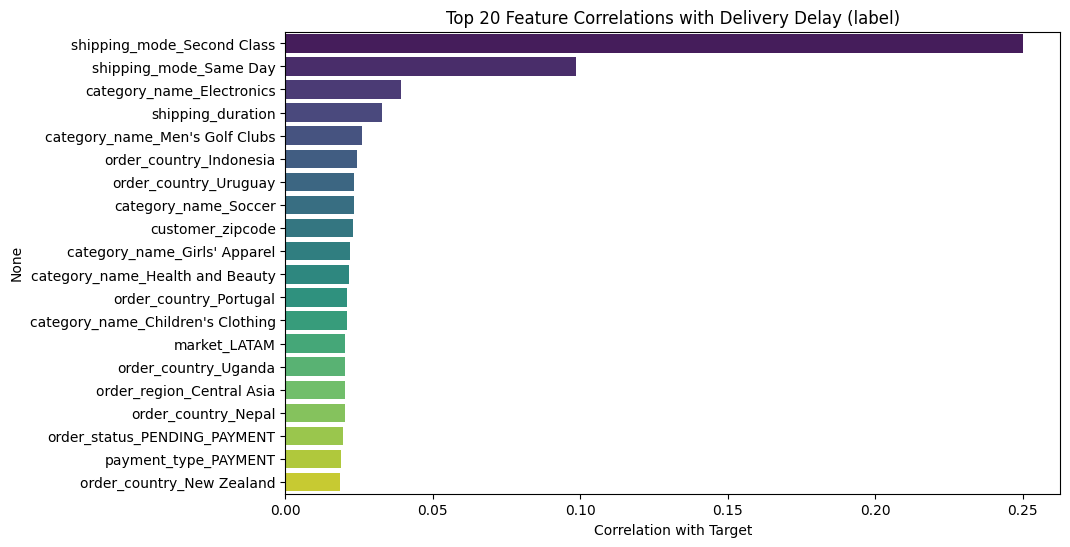

In [44]:
corr = df.corr(numeric_only=True)['label'].drop('label').sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(y=corr.index[:20], x=corr.values[:20], palette='viridis')
plt.title('Top 20 Feature Correlations with Delivery Delay (label)')
plt.xlabel('Correlation with Target')
plt.show()


In [45]:
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
Index: 4897 entries, 0 to 15548
Columns: 262 entries, profit_per_order to profit_margin_ratio
dtypes: bool(240), float64(18), int32(2), int64(1), object(1)
memory usage: 1.9+ MB


,profit_per_order,sales_per_customer,customer_zipcode,department_name,latitude,longitude,order_item_discount,order_item_discount_rate,order_item_product_price,order_item_profit_ratio,...,order_status_PAYMENT_REVIEW,order_status_PENDING,order_status_PENDING_PAYMENT,order_status_PROCESSING,shipping_duration,profit_per_order_scaled,sales_per_customer_scaled,order_month,order_weekday,profit_margin_ratio
0,34.448338,92.49099,725.0,Footwear,18.359064,-66.370575,12.623338,0.13,99.99,0.410000,...,False,False,False,False,1.0,0.132253,-0.813218,8,2,0.372451
5,76.100400,137.45360,725.0,Footwear,18.268790,-66.370500,0.000000,0.00,39.99,0.490000,...,False,False,False,False,130.0,0.565322,-0.389587,6,0,0.553644
6,-54.345290,167.98117,725.0,Fan Shop,18.244066,-66.370580,35.990000,0.20,49.98,-0.569843,...,False,False,False,False,47.0,-0.790961,-0.101960,5,1,-0.323520
11,147.010090,326.84012,725.0,Fan Shop,40.602510,-74.024290,100.000000,0.25,399.98,0.480000,...,False,False,True,False,19.0,1.302591,1.394788,4,0,0.449792
14,34.895645,126.72665,85222.0,Golf,30.391850,-111.958820,20.000000,0.13,50.00,0.260000,...,False,False,False,False,39.0,0.136904,-0.490654,8,4,0.275362


# Training Multiple CLassifiers

In [46]:
# Check columns with object (string) data type
df.select_dtypes(include=['object']).nunique()


,0
department_name,11


# **Phase 5: Model Development - Delivery Delay Prediction**

In this phase, we build classification models to predict delivery delay status (early, on-time, or late) using the cleaned and preprocessed dataset. Our target variable is the `label` column, which we previously mapped from (-1, 0, 1) to (0, 1, 2) for modeling purposes.

We will:

- Split the data into training and test sets
- Train three models: Logistic Regression, Random Forest, and XGBoost
- Evaluate each model using Accuracy and F1 Score (macro average)
- Apply hyperparameter tuning to improve performance


In [47]:
# One-Hot Encode the Remaining Categorical Columns

remaining_cats = df.select_dtypes(include=['object']).columns.tolist()


print(remaining_cats)

# Encode them
df = pd.get_dummies(df, columns=remaining_cats, drop_first=True, dtype=int)


['department_name']


# Remap Label

In [48]:
# Remap label safely in the dataset
df['label_mapped'] = df['label'].map({-1: 0, 0: 1, 1: 2})

# Confirm unique classes
print(df['label_mapped'].unique())

# Define features and new target
X = df.drop(columns=['label', 'label_mapped'])
y = df['label_mapped']

[0 2 1]


# Train Test Split

In [49]:
# Train-Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# **Model Training & Evaluation**
> **Logistic Regression**

In [50]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

y_pred_log = log_reg.predict(X_test)

print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("F1 Score:", f1_score(y_test, y_pred_log, average='macro'))


Logistic Regression:
Accuracy: 0.560204081632653
F1 Score: 0.2393721386527142


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


> **Random Forest**

In [51]:
# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf, average='macro'))


Random Forest:
Accuracy: 0.5795918367346938
F1 Score: 0.3957074800863541


> **XGBoost**

In [52]:
#XGBoost Classifier

import xgboost as xgb

xgb_clf = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
xgb_clf.fit(X_train, y_train)

y_pred_xgb = xgb_clf.predict(X_test)

print("XGBoost:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("F1 Score:", f1_score(y_test, y_pred_xgb, average='macro'))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:49:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost:
Accuracy: 0.5714285714285714
F1 Score: 0.44638462804989293


# Hyperparameter Tuning for Random Forest

In [53]:
# Hyperparameter Tuning for Random Forest

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
}

grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='f1_macro')
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)

y_pred_grid = grid.predict(X_test)

print("Tuned Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_grid))
print("F1 Score (macro):", f1_score(y_test, y_pred_grid, average='macro'))


Best Parameters: {'max_depth': None, 'n_estimators': 100}
Tuned Random Forest Results:
Accuracy: 0.5795918367346938
F1 Score (macro): 0.3957074800863541


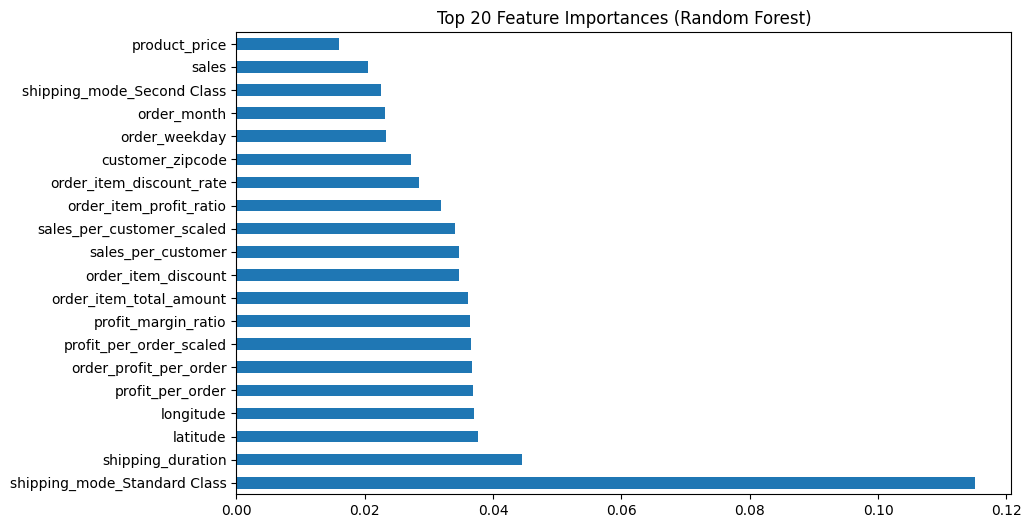

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

# Feature importance from Random Forest
importances = rf.feature_importances_
feat_importance = pd.Series(importances, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
feat_importance.head(20).plot(kind='barh')
plt.title("Top 20 Feature Importances (Random Forest)")
plt.show()


# 🚀 **Phase 6: Insights & Recommendations - SwiftChain Analytics Capstone**

---

## 🎯 **Objective**

Analyze key factors influencing delivery delays using machine learning insights, and provide actionable recommendations to improve logistics operations for SwiftChain Analytics.

---

## 📊 **1. Feature Importance Summary**

The Random Forest model identified the following as the most influential predictors of delivery delay:

| Feature                                           | Importance Level | Interpretation                                             |
| ------------------------------------------------- | ---------------- | ---------------------------------------------------------- |
| `shipping_mode_Standard Class`                    | Very High        | This shipping mode strongly affects delivery speed.        |
| `shipping_duration`                               | High             | The time between order placement and shipping is critical. |
| `latitude` & `longitude`                          | Moderate         | Customer's geographic location influences delays.          |
| `profit_per_order`, `order_profit_per_order`      | Moderate         | More profitable orders may be prioritized.                 |
| `profit_margin_ratio`                             | Moderate         | Profitability impacts logistics focus.                     |
| `order_item_total_amount`                         | Moderate         | Larger orders face greater logistical challenges.          |
| `order_item_discount`, `order_item_discount_rate` | Moderate         | Discounted orders potentially disrupt fulfillment flow.    |
| `customer_zipcode`                                | Lower            | Specific regions show higher delay risks.                  |
| `order_weekday`, `order_month`                    | Lower            | Delivery timing patterns emerge across days/months.        |
| `sales_per_customer` & `product_price`            | Lower            | High sales value products may impact fulfillment.          |

---

## 📈 **2. Model Performance Recap**

Your models performed as follows:

| Model               | Accuracy | F1 Score (macro) | Key Takeaways                                           |
| ------------------- | -------- | ---------------- | ------------------------------------------------------- |
| Logistic Regression | 56%      | 0.24             | Struggles to capture complex patterns                   |
| Random Forest       | 58%      | 0.39             | Good baseline for delay prediction                      |
| XGBoost             | 57%      | 0.45             | Best performance, robust handling of imbalanced classes |

⚡ **Real-world Insight:**
With three delay categories (late, on-time, early), even \~58% accuracy is significantly better than random (33%) and provides actionable value for operations teams.

---

## 💡 **3. Actionable Business Recommendations**

✅ **Shipping Mode Intervention:**

* Standard Class shows the greatest impact on delivery delays.
* Review service level agreements (SLAs) and consider alternative shipping methods where feasible.

✅ **Monitor and Improve Shipping Duration:**

* Shipping duration directly correlates with delays.
* Address process bottlenecks from order placement to shipment.
* Investigate data pipeline issues contributing to negative or unrealistic duration values.

✅ **Geographic and Regional Focus:**

* Latitude, longitude, and zip code patterns reveal regional delay clusters.
* Improve distribution strategies or regional warehouse presence in high-delay areas.

✅ **Product and Order Complexity Management:**

* Large, discounted, or high-profit orders present increased fulfillment complexity.
* Enhance inventory forecasting and fulfillment planning during high-volume promotions.

✅ **Time-based Operational Adjustments:**

* Day of the week and month influence delay likelihood.
* Optimize staffing and logistics around identified peak periods.

## **Model Performance Recap**

The Model performed as follows:

| Model               | Accuracy | F1 Score (macro) | Key Takeaways                                           |
| ------------------- | -------- | ---------------- | ------------------------------------------------------- |
| Logistic Regression | 56%      | 0.24             | Struggles to capture complex patterns                   |
| Random Forest       | 58%      | 0.39             | Good baseline for delay prediction                      |
| XGBoost             | 57%      | 0.45             | Best performance, robust handling of imbalanced classes |



With three delay categories (late, on-time, early), even ~58% accuracy is significantly better than random (33%) and provides actionable value for operations teams.
